---

# 3. Pandas

Pandas is the best known Python library for manipulating and analyzing data. It is built on top of NumPy, so many features are similar. We will use Pandas to work with structured datasets.

Just as NumPy provides us with arrays and with them we access many new features, Pandas provides us with DataFrames and Series. By far the most used object is the first one, DataFrames.

We are going to use the open data of the Argentine government, so you will have to download the csv from the following link: [Names 2010-2014](https://www.datos.gob.ar/dataset/otros-nombres-personas-fisicas)

In [21]:
import pandas as pd

## Reading a csv file

In [22]:
df_names = pd.read_csv(
    "https://infra.datos.gob.ar/catalog/otros/dataset/2/distribution/2.20/download/nombres-2010-2014.csv"
)
df_names

,nombre,cantidad,anio
0,Benjamin,2986,2010
1,Sofia,2252,2010
2,Bautista,2176,2010
3,Joaquín,2111,2010
4,Juan Ignacio,2039,2010
...,...,...,...
871489,Leire Jasmin,1,2014
871490,Isaias Sebastian Ariel,1,2014
871491,Yanira Valentina,1,2014
871492,Angie Ainara,1,2014


In [23]:
df_names.dtypes

nombre      object
cantidad     int64
anio         int64
dtype: object

## Columns renaming

First of all let's rename the columns to `name`, `amount` and `year`

In [24]:
df_names.rename(
    columns={"nombre": "name", "cantidad": "amount", "anio": "year"}, inplace=True
)
df_names

,name,amount,year
0,Benjamin,2986,2010
1,Sofia,2252,2010
2,Bautista,2176,2010
3,Joaquín,2111,2010
4,Juan Ignacio,2039,2010
...,...,...,...
871489,Leire Jasmin,1,2014
871490,Isaias Sebastian Ariel,1,2014
871491,Yanira Valentina,1,2014
871492,Angie Ainara,1,2014


## Some Pandas useful functions

**TODO:** Investigate the functions that are implemented in the next cell. What do they do? What do you think they can be useful for?

In [25]:
# df_names.head()
# df_names.tail()
# df_names.tail()
# df_names.count()
df_names.shape

(871494, 3)

## Append a new row

**TODO:** Suppose that in the data load, someone forgot to add a name and its respective amount and year.

Let's add to our dataset the following row with said information:

Name: "Daenerys Stormborn of the House Targaryen, First of Her Name de ella, the Unburnt, Queen of the Andals and the First Men, Khaleesi of the Great Grass Sea, Breaker of Chains, and Mother of Dragons"

Amount: 100
Year: 2011

In [26]:
new_row = pd.DataFrame(
    {
        "name": [
            "Daenerys Stormborn of the House Targaryen, First of Her Name de ella, the Unburnt, Queen of the Andals and the First Men, Khaleesi of the Great Grass Sea, Breaker of Chains, and Mother of Dragons"
        ],
        "amount": [100],
        "year": [2011],
    }
)

# Concatenate the new DataFrame with the original DataFrame
df_names = pd.concat([df_names, new_row], ignore_index=True)

df_names

,name,amount,year
0,Benjamin,2986,2010
1,Sofia,2252,2010
2,Bautista,2176,2010
3,Joaquín,2111,2010
4,Juan Ignacio,2039,2010
...,...,...,...
871490,Isaias Sebastian Ariel,1,2014
871491,Yanira Valentina,1,2014
871492,Angie Ainara,1,2014
871493,Elias Hernando,1,2014


**TODO:** Investigate the columns and index functions. What do they do? What data type is their output? What known data type do they resemble?

In [27]:
df_names.columns

Index(['name', 'amount', 'year'], dtype='object')

In [28]:
df_names.index

RangeIndex(start=0, stop=871495, step=1)

## Add a new column

**TODO:** Add a column to the dataframe that corresponds to the number of characters in each name

In [29]:
# Complete this cell with your code

df_names["name_length"] = df_names["name"].apply(lambda x: len(x))

## Filtering by mask

Its implementation is very similar in both NumPy and Pandas, so we will see how to do it first in NumPy then in Pandas.

Suppose we make 100 rolls of a die, but we want to select only those rolls that were less than four. How can we do it?

In [30]:
import numpy as np

dice = np.random.randint(1, 7, size=100)
print(dice)

[2 2 4 6 2 2 6 4 5 2 1 3 4 6 4 6 2 4 1 1 4 5 6 3 2 5 5 1 5 4 6 1 5 2 4 5 1
 4 6 2 1 1 3 2 2 3 1 2 6 1 2 5 1 1 1 6 2 6 1 5 5 3 1 1 3 4 1 1 4 6 3 5 1 4
 4 3 1 6 2 1 4 5 6 4 4 1 6 6 1 5 1 6 3 5 6 5 5 2 2 5]


What we can do is create a mask:

In [31]:
mask = dice > 3
print(mask)
print(type(mask))

[False False  True  True False False  True  True  True False False False
  True  True  True  True False  True False False  True  True  True False
 False  True  True False  True  True  True False  True False  True  True
 False  True  True False False False False False False False False False
  True False False  True False False False  True False  True False  True
  True False False False False  True False False  True  True False  True
 False  True  True False False  True False False  True  True  True  True
  True False  True  True False  True False  True False  True  True  True
  True False False  True]
<class 'numpy.ndarray'>


In [32]:
print(dice[mask])

[4 6 6 4 5 4 6 4 6 4 4 5 6 5 5 5 4 6 5 4 5 4 6 6 5 6 6 5 5 4 4 6 5 4 4 6 4
 5 6 4 4 6 6 5 6 5 6 5 5 5]


In [33]:
print(dice.sum())

336


In [34]:
print(dice[dice > 3])

[4 6 6 4 5 4 6 4 6 4 4 5 6 5 5 5 4 6 5 4 5 4 6 6 5 6 6 5 5 4 4 6 5 4 4 6 4
 5 6 4 4 6 6 5 6 5 6 5 5 5]


**TODO:** Going back to our dataset, suppose we want to keep those rows with names that were repeated more than 2000 times in the corresponding year. Note that in the result a name may appear more than once in different years.

In [35]:
# Complete this cell with your code

# We create a copy:

filtered_df_1 = df_names.copy()

# Calculate the count of occurrences for each name-year combination:
filtered_df_1["count"] = filtered_df_1.groupby(["year"])["name"].count()

# Filtering the df based on the count condition:
filtered_df_1 = filtered_df_1[filtered_df_1["count"] > 2000]

# We display the filtered df
filtered_df_1

,name,amount,year,name_length,count
2010,Ivan Alejandro,31,2010,14,135000.0
2011,Lourdes Morena,31,2010,14,119432.0
2012,Leonel Nicolas,31,2010,14,203486.0
2013,Tiziano Joel,31,2010,12,204470.0
2014,Jeremias Ismael,31,2010,15,209107.0


**TODO:** What if we want to select those names with more than 8 characters and from 2010 onwards?

In [38]:
# Complete this cell with your code

# Filter the DataFrame based on the count condition, name length, and year
selected_names = df_names[(df_names["name_length"] > 8) & (df_names["year"] >= 2010)]

# Display the filtered DataFrame
selected_names

,name,amount,year,name_length
4,Juan Ignacio,2039,2010,12
7,Valentina,1972,2010,9
10,Valentino,1665,2010,9
14,Francisco,1338,2010,9
25,Juan Cruz,1071,2010,9
...,...,...,...,...
871490,Isaias Sebastian Ariel,1,2014,22
871491,Yanira Valentina,1,2014,16
871492,Angie Ainara,1,2014,12
871493,Elias Hernando,1,2014,14


## Statistics

**TODO:** Obtain the mean value and standard deviation of each numeric column. Is there a function in Pandas that will give us even more statistics?

In [39]:
# Complete this cell with your code

df_names.describe()

,amount,year,name_length
count,871495.000000,871495.000000,871495.000000
mean,4.278334,2012.267646,14.357074
std,34.615844,1.370918,3.677649
min,1.000000,2010.000000,2.000000
25%,1.000000,2011.000000,12.000000
50%,1.000000,2012.000000,14.000000
75%,2.000000,2013.000000,16.000000
max,4960.000000,2014.000000,195.000000


## Delete a column

**TODO:** Delete the column `amount_chars` from the dataframe.

In [40]:
# Complete this cell with your code
df_names.drop("amount", axis=1)

,name,year,name_length
0,Benjamin,2010,8
1,Sofia,2010,5
2,Bautista,2010,8
3,Joaquín,2010,7
4,Juan Ignacio,2010,12
...,...,...,...
871490,Isaias Sebastian Ariel,2014,22
871491,Yanira Valentina,2014,16
871492,Angie Ainara,2014,12
871493,Elias Hernando,2014,14


## Sorting by column

**TODO:** Sort the dataframe by `amount` and descending

In [41]:
# Complete this cell with your code
df_names.sort_values("amount", ascending=False)

,name,amount,year,name_length
457917,Benjamin,4960,2013,8
254431,Benjamin,4724,2012,8
662387,Benjamin,4286,2014,8
457918,Isabella,3587,2013,8
662388,Martina,3563,2014,7
...,...,...,...,...
387497,Abraham Jose Emanuel,1,2012,20
387498,Yeison Dionel,1,2012,13
387499,Sherin Luisel,1,2012,13
387500,Antuan Hernán William,1,2012,21


## Pandas groupby and plot

**TODO:** Group the number of names by `year` and plot it using vertical bars

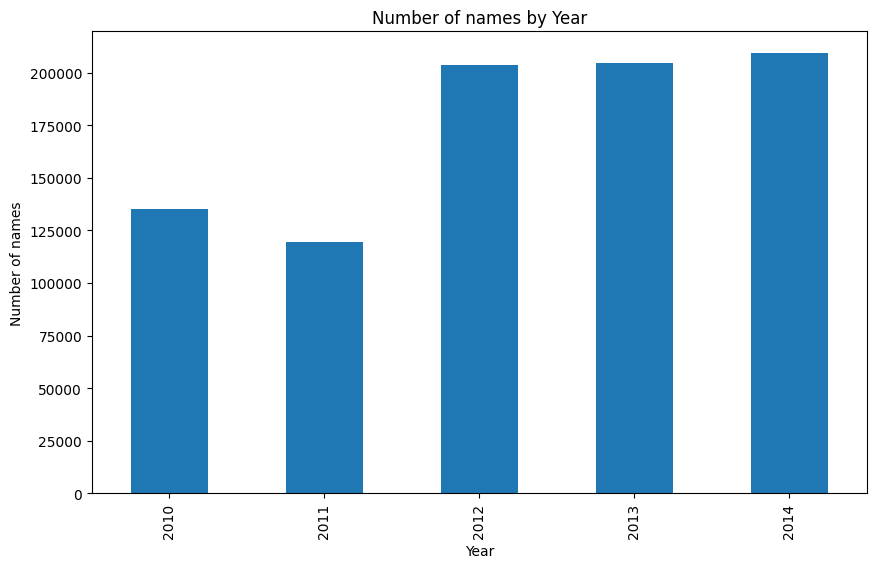

In [43]:
# Complete this cell with your code

# Import libraries:
import matplotlib.pyplot as plt

# Group the number of names by 'year':
name_counts = df_names.groupby("year").size()

# Plotting the grouped data using vertical bars:
name_counts.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Year")
plt.ylabel("Number of names")
plt.title("Number of names by Year")
plt.show()